In [30]:
html_code ="""<div style="text-align: center; background-color: #f0f0f0; padding: 20px;">
    <h1 style="color: #333;">Gold_Price_Prediction</h1>
</div>"""

HTML(html_code)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from IPython.display import HTML

In [31]:
train=pd.read_csv("gld_price_data.csv")

In [32]:
train

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [33]:
train.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [34]:
train.drop(columns=['Date'],inplace=True)

In [35]:
train.head(2)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491


In [36]:
text="""<h1 style="color:blue;padding:5px">Correlation Factor</h1>"""
HTML(text)

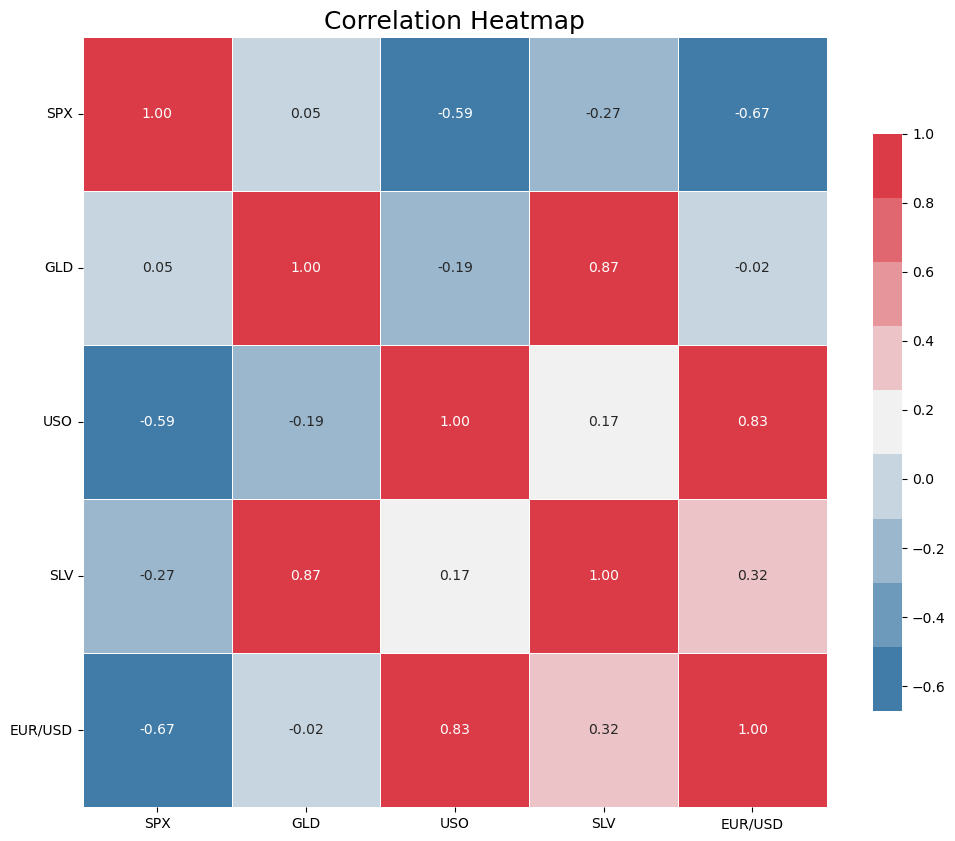

In [37]:
#constructing a heatmap to check dependencies of other features and gold price
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=18)
plt.yticks(rotation=0)
plt.show()

In [38]:
train.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
X=train.drop(columns=['GLD']).values
Y=train['GLD'].values

In [40]:
X

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [41]:
Y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

# Linear Regression


In [42]:
model=LinearRegression()

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
model.fit(X_train,Y_train)

LinearRegression()

In [45]:
Y_predict_train=model.predict(X_train)
training_Error=mean_squared_error(Y_train,Y_predict_train)
training_r2_score=r2_score(Y_train,Y_predict_train)
print(training_Error)
print(training_r2_score)

66.33380428420358
0.8771892526181604


In [46]:
Y_predict_test=model.predict(X_test)
test_Error=mean_squared_error(Y_test,Y_predict_test)
test_r2_score=r2_score(Y_test,Y_predict_test)
print(test_Error)
print(test_r2_score)

56.165594215005996
0.8975640982991402


# Random Forest Regressor

In [47]:
#now fitting the random forest regressor model
model = RandomForestRegressor(n_estimators=200)

In [48]:
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [49]:
Y_predict_train=model.predict(X_train)
training_Error=mean_squared_error(Y_train,Y_predict_train)
training_r2_score=r2_score(Y_train,Y_predict_train)
print(training_Error)
print(training_r2_score)

0.7357876584552284
0.9986377589341617


In [50]:
Y_predict_test=model.predict(X_test)
test_Error=mean_squared_error(Y_test,Y_predict_test)
test_r2_score=r2_score(Y_test,Y_predict_test)
print(test_Error)
print(test_r2_score)

5.485527583647605
0.9899953882409784


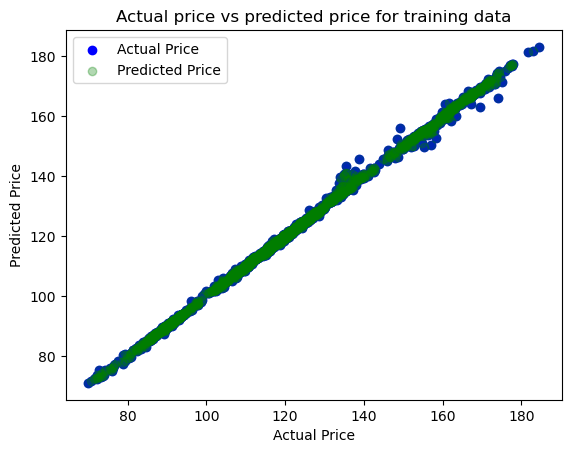

In [51]:
plt.scatter(Y_train, Y_predict_train, color='blue', label='Actual Price')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.scatter(Y_train, Y_predict_train, color='green', label='Predicted Price',alpha=0.3)  
plt.title("Actual price vs predicted price for training data")
plt.legend()
plt.show()

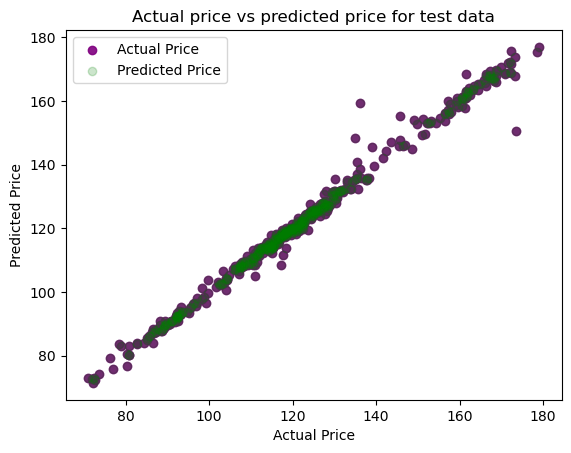

In [52]:
plt.scatter(Y_test, Y_predict_test, color='purple', label='Actual Price',alpha=0.9)  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.scatter(Y_test, Y_predict_test, color='green', label='Predicted Price',alpha=0.2)  
plt.title("Actual price vs predicted price for test data")
plt.legend()
plt.show()

In [ ]:
#-----------end-----------